# **Analisis de Datos de Ligas de Fútbol Europeo**
 Usando una base de datos proveniente de la página web Kaggle, se procederá a analizar la data empleando SQL, con el objetivo de mostrar los datos de los distintos partidos de varias ligas europeas entre 2008 y 2016. En este caso, el análisis se centrará únicamente en las cinco principales.

1. Se Importa la fuente de datos desde la página koggle

In [1]:
import kagglehub
hugomathien_soccer_path = kagglehub.dataset_download('hugomathien/soccer')

print('Data source import complete.')

100%|██████████| 32.7M/32.7M [00:00<00:00, 170MB/s]

Extracting files...


Data source import complete.


2. Se configura la ruta de archivo de los datos

In [2]:
#Imports

import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Get the path to the downloaded dataset
path = hugomathien_soccer_path

database = path + '/database.sqlite'

3. Se crea la conexión a la DB, y se ven las tablas existentes

In [3]:
conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


3.1 Query simple de la tabla "Country"

In [4]:
countries = pd.read_sql("""SELECT *
                        FROM Country;""", conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


4. Se relaciona a cada País con su Liga correspondiente

In [5]:
leagues = pd.read_sql("""SELECT *
                        FROM League
                        JOIN Country ON Country.id = League.country_id;""", conn)
leagues

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


5. Listado de equipos, ordenados en orden alfabético

In [6]:
teams = pd.read_sql("""SELECT *
                        FROM Team
                        ORDER BY team_long_name
                        LIMIT 15;""", conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


6. Listado de partidos, en este caso los 15 más recientes de la Premier League

In [8]:
detailed_matches = pd.read_sql("""SELECT Match.id,
                                        Country.name AS country_name,
                                        League.name AS league_name,
                                        season,
                                        stage AS match_week,
                                        date,
                                        HT.team_long_name AS  home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal,
                                        away_team_goal
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'England'
                                ORDER by date desc
                                LIMIT 15;""", conn)
detailed_matches

,id,country_name,league_name,season,match_week,date,home_team,away_team,home_team_goal,away_team_goal
0,4702,England,England Premier League,2015/2016,38,2016-05-17 00:00:00,Manchester United,Bournemouth,3,1
1,4699,England,England Premier League,2015/2016,38,2016-05-15 00:00:00,Arsenal,Aston Villa,4,0
2,4700,England,England Premier League,2015/2016,38,2016-05-15 00:00:00,Chelsea,Leicester City,1,1
3,4701,England,England Premier League,2015/2016,38,2016-05-15 00:00:00,Everton,Norwich City,3,0
4,4703,England,England Premier League,2015/2016,38,2016-05-15 00:00:00,Newcastle United,Tottenham Hotspur,5,1
5,4704,England,England Premier League,2015/2016,38,2016-05-15 00:00:00,Southampton,Crystal Palace,4,1
6,4705,England,England Premier League,2015/2016,38,2016-05-15 00:00:00,Stoke City,West Ham United,2,1
7,4706,England,England Premier League,2015/2016,38,2016-05-15 00:00:00,Swansea City,Manchester City,1,1
8,4707,England,England Premier League,2015/2016,38,2016-05-15 00:00:00,Watford,Sunderland,2,2
9,4708,England,England Premier League,2015/2016,38,2016-05-15 00:00:00,West Bromwich Albion,Liverpool,1,1


7. Resumen de cada temporada de las 5 ligas europeas más importantes

In [9]:
leages_by_season = pd.read_sql("""SELECT Country.name AS country_name,
                                        League.name AS league_name,
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        round(avg(home_team_goal), 2) AS avg_home_team_scors,
                                        round(avg(away_team_goal), 2) AS avg_away_team_goals,
                                        round(avg(home_team_goal-away_team_goal), 2) AS avg_goal_dif,
                                        round(avg(home_team_goal+away_team_goal), 2) AS avg_goals_per_game,
                                        sum(home_team_goal+away_team_goal) AS total_goals
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season desc
                                ;""", conn)
leages_by_season

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals_per_game,total_goals
0,England,England Premier League,2015/2016,38,20,1.49,1.21,0.28,2.70,1026
1,England,England Premier League,2014/2015,38,20,1.47,1.09,0.38,2.57,975
2,England,England Premier League,2013/2014,38,20,1.57,1.19,0.38,2.77,1052
3,England,England Premier League,2012/2013,38,20,1.56,1.24,0.32,2.80,1063
4,England,England Premier League,2011/2012,38,20,1.59,1.22,0.37,2.81,1066
5,England,England Premier League,2010/2011,38,20,1.62,1.17,0.45,2.80,1063
6,England,England Premier League,2009/2010,38,20,1.70,1.07,0.62,2.77,1053
7,England,England Premier League,2008/2009,38,20,1.40,1.08,0.32,2.48,942
8,France,France Ligue 1,2015/2016,38,20,1.44,1.09,0.35,2.53,960
9,France,France Ligue 1,2014/2015,38,20,1.41,1.08,0.33,2.49,947


8. Promedio de goles por partido a través de cada temporda en las distintas ligas

<Axes: title={'center': 'Promedio de goles por partido a través de cada temporda'}, xlabel='season'>

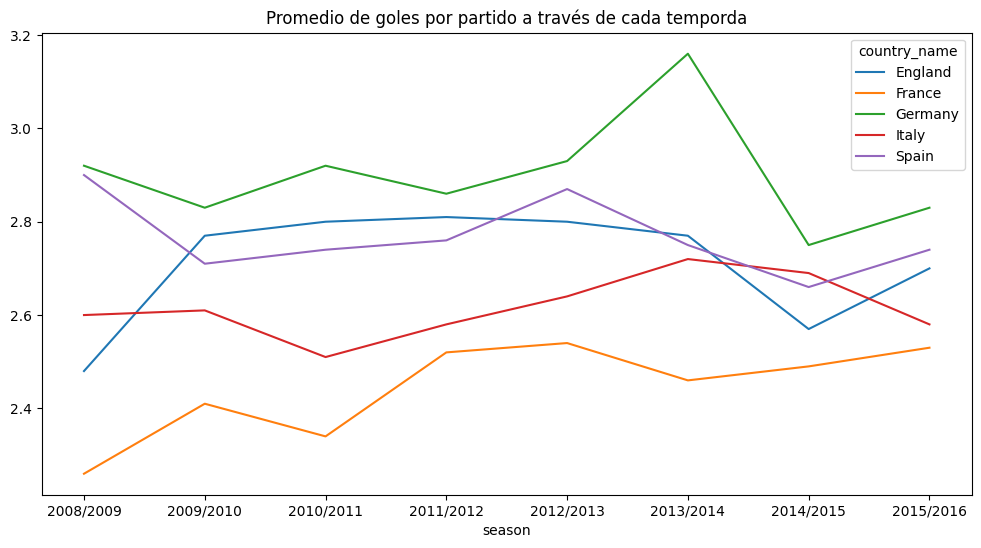

In [35]:
df = leages_by_season.pivot(index='season', columns='country_name', values='avg_goals_per_game')

df.plot(figsize=(12,6),title='Promedio de goles por partido a través de cada temporda')

9. Diferencia de promedio de goles entre equipos locales y visitantes a lo largo de las temporadas

<Axes: title={'center': 'Diferencia de promedio de goles entre equipos locales y visitantes'}, xlabel='season'>

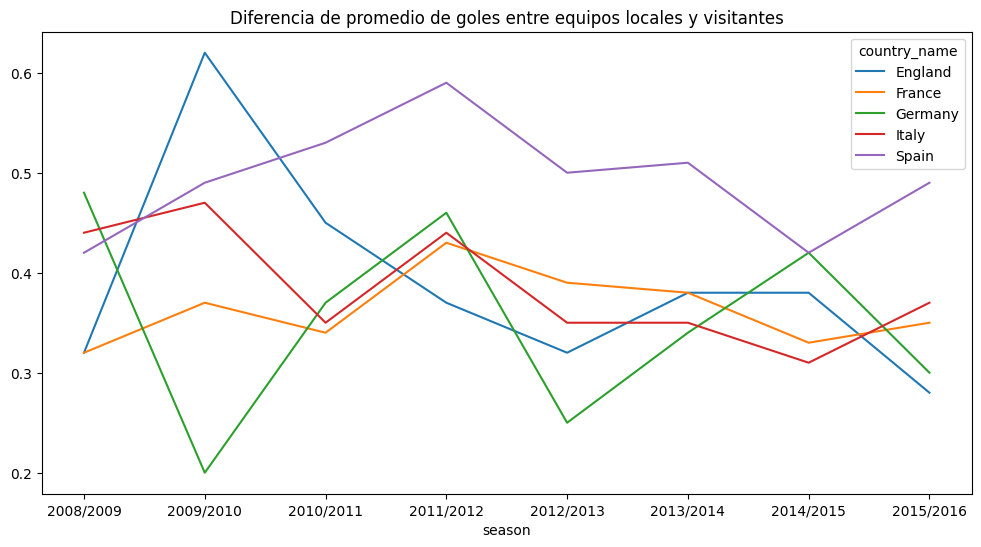

In [36]:
df = leages_by_season.pivot(index='season', columns='country_name', values='avg_goal_dif')

df.plot(figsize=(12,6),title='Diferencia de promedio de goles entre equipos locales y visitantes')

10. Distribución de peso y altura de jugadores en las distintas ligas europeas

In [32]:
players_height = pd.read_sql("""SELECT CASE
                                        WHEN ROUND(height)<165 then 165
                                        WHEN ROUND(height)>195 then 195
                                        ELSE ROUND(height)
                                        END AS calc_height,
                                        COUNT(height) AS distribution,
                                        ROUND(AVG(weight)) AS avg_weight
                            FROM PLAYER
                            LEFT JOIN (SELECT Player_Attributes.player_api_id
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.player_api_id)
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                            GROUP BY calc_height
                            ORDER BY distribution DESC
                                ;""", conn)
players_height

,calc_height,distribution,avg_weight
0,183.0,1954,170.0
1,178.0,1489,161.0
2,180.0,1388,165.0
3,188.0,1305,179.0
4,185.0,1278,175.0
5,175.0,1188,156.0
6,191.0,652,185.0
7,173.0,530,153.0
8,193.0,470,189.0
9,170.0,403,148.0


11. Equipos de las 5 principales ligas con mayor cantidad de goles por partido en cada temporada

In [27]:
top_5_leagues = ['Spain', 'Germany', 'France', 'Italy', 'England']

team_performance_top_5_leagues = team_performance[
    team_performance['team_long_name'].isin(
        pd.read_sql("""SELECT T.team_long_name
                        FROM Team AS T
                        JOIN Match ON T.team_api_id = Match.home_team_api_id OR T.team_api_id = Match.away_team_api_id
                        JOIN League ON League.id = Match.league_id
                        JOIN Country ON Country.id = League.country_id
                        WHERE Country.name IN ('Spain', 'Germany', 'France', 'Italy', 'England')
                        GROUP BY T.team_long_name""", conn)['team_long_name']
    )
]

top_5_teams_avg_goals_by_season = team_performance_top_5_leagues.groupby('season').apply(lambda x: x.nlargest(5, 'avg_total_goals'))

top_5_teams_avg_goals_by_season

/tmp/ipython-input-3164995170.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_teams_avg_goals_by_season = team_performance_top_5_leagues.groupby('season').apply(lambda x: x.nlargest(5, 'avg_total_goals'))


team_long_name     season  avg_home_goals  \
season                                                                
2008/2009 349               FC Barcelona  2008/2009            2.16   
          126            Atlético Madrid  2008/2009            2.13   
          1372             VfL Wolfsburg  2008/2009            2.32   
          1044            Real Madrid CF  2008/2009            1.89   
          583                Hannover 96  2008/2009            2.21   
2009/2010 1045            Real Madrid CF  2009/2010            2.03   
          1373             VfL Wolfsburg  2009/2010            1.71   
          253                    Chelsea  2009/2010            2.26   
          96                     Arsenal  2009/2010            1.95   
          195                    Burnley  2009/2010            2.03   
2010/2011 367           FC Bayern Munich  2010/2011            2.21   
          1046            Real Madrid CF  2010/2011            2.16   
          163                  Blackpool  2010/2011            1.87   
          1364             VfB Stuttgart  2010/2011            1.91   
          1417      West Bromwich Albion  2010/2011            1.87   
2011/2012 1047            Real Madrid CF  2011/2012            2.18   
          352               FC Barcelona  2011/2012            2.39   
          428              FC Schalke 04  2011/2012            2.26   
          5                   1. FC Köln  2011/2012            1.94   
          162           Blackburn Rovers  2011/2012            1.87   
2012/2013 353               FC Barcelona  2012/2013            2.32   
          1048            Real Madrid CF  2012/2013            2.32   
          181          Borussia Dortmund  2012/2013            1.85   
          587                Hannover 96  2012/2013            2.15   
          369           FC Bayern Munich  2012/2013            1.85   
2013/2014 1297       TSG 1899 Hoffenheim  2013/2014            2.41   
          786                  Liverpool  2013/2014            2.24   
          1049            Real Madrid CF  2013/2014            2.21   
          575               Hamburger SV  2013/2014            1.91   
          797            Manchester City  2013/2014            2.29   
2014/2015 1050            Real Madrid CF  2014/2015            2.32   
          312        Eintracht Frankfurt  2014/2015            2.12   
          355               FC Barcelona  2014/2015            1.95   
          1170          SV Werder Bremen  2014/2015            1.94   
          1378             VfL Wolfsburg  2014/2015            1.85   
2015/2016 1051            Real Madrid CF  2015/2016            2.32   
          356               FC Barcelona  2015/2016            2.16   
          1369             VfB Stuttgart  2015/2016            1.91   
          192   Borussia Mönchengladbach  2015/2016            2.18   
          184          Borussia Dortmund  2015/2016            2.03   

                avg_away_goals  avg_total_goals  total_matches  
season                                                          
2008/2009 349             1.53             3.68             38  
          126             1.47             3.61             38  
          1372            1.24             3.56             34  
          1044            1.66             3.55             38  
          583             1.26             3.47             34  
2009/2010 1045            1.58             3.61             38  
          1373            1.88             3.59             34  
          253             1.29             3.55             38  
          96              1.32             3.26             38  
          195             1.24             3.26             38  
2010/2011 367             1.35             3.56             34  
          1046            1.39             3.55             38  
          163             1.63             3.50             38  
          1364            1.59             3.50             34  
   